## IMPLEMENTATION OF ANALYTICAL HIERACHY PROCESS IN PYTHON

#### What is Analytical Hierarchy Process?

The Analytic Hierarchy Process (AHP) is a method for organizing and analyzing complex decisions, using math and psychology. 
It contains three parts:
1. The ultimate goal or problem you're trying to solve, 
2. The criteria you will judge the alternatives on, and 
3. All of the possible solutions, called alternatives.

AHP provides a rational framework for a needed decision by quantifying its criteria and alternative options, and for relating those elements to the overall goal.

### AHP Implementation

In the Analytic Hierarchy Process (AHP), decision makers make pairwise comparisons of alternatives and criteria. The AHP allows to make these pairwise comparisons verbally or numerically. Although verbal statements are intuitively attractive for preference elicitation, there is overwhelming evidence that people have very different numerical interpretations of the same verbal expressions.

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### AHP Verbal judgement to Numerical rating

In [3]:
Rating_dic = {'Verbal Judgement': ['Extremely important / prefered','Very strongly to extremely important / prefered',
                                       'Very strongly important / prefered','Strongly to very strongly important / prefered',
                                      'Strongly important / prefered','Moderately to strongly important / prefered',
                                     'Moderately important / prefered', 'Equally to moderately important / prefered','Equally important / prefered' ],
                 'Numerical Rating': [9,8,7,6,5,4,3,2,1]}

Rating_comparison = pd.DataFrame(Rating_dic).set_index('Verbal Judgement')
Rating_comparison

,Numerical Rating
Verbal Judgement,
Extremely important / prefered,9
Very strongly to extremely important / prefered,8
Very strongly important / prefered,7
Strongly to very strongly important / prefered,6
Strongly important / prefered,5
Moderately to strongly important / prefered,4
Moderately important / prefered,3
Equally to moderately important / prefered,2
Equally important / prefered,1


## Problem Statement

The purchasing manager (PM) of Dextro Payne Limited is responsible for deciding which of the available companies to purchase 50 buses for a new transportation business. After a preliminary feasibility study and analysis of the makes, models of several buses and process associated with the purchase, the PM narrowed her list of decision alternatives to three options;
1. **Project I**: Purchases of Accord models
2. **Project II**: Purchases of Saturn models, and
3. **Project III**: Purchases of Cavalier models.

Dextro Payne decided that the following criteria were relevant for her purchase decision process
1. **Miles per gallon (MPG)**
2. **Comfort**
3. **Style**
4. **Price**

### Table II: Pairwise Comparisons of the Four Criteria for the Bus Selection Problem

In [4]:
comparison_dic = {'Pairwise Comparison': ['Price-MPG','Price-Comfort','Price-Style','MPG-Comfort','MPG-Style','Comfort-Style'],
                 'More Important criterion': ['Price','Price','Price','Comfort','Style','Style'],
                 'How much important': ['Moderately','Equally to Moderately','Equally to Moderately','Moderatelly to Strongly','Moderatelly to Strongly','Equally to Moderately'],
                 'Numerical rating': [3,2,2,4,4,2]}

criteria_comparison = pd.DataFrame(comparison_dic).set_index('Pairwise Comparison')
criteria_comparison

,More Important criterion,How much important,Numerical rating
Pairwise Comparison,,,
Price-MPG,Price,Moderately,3
Price-Comfort,Price,Equally to Moderately,2
Price-Style,Price,Equally to Moderately,2
MPG-Comfort,Comfort,Moderatelly to Strongly,4
MPG-Style,Style,Moderatelly to Strongly,4
Comfort-Style,Style,Equally to Moderately,2


***Conversion of the verbal judgement to Numerical values***

In [5]:
Numeric_dic = {'Pairwise Comparison': ['Price','Comfort','Style','MPG'],
                 'Price': [1,1/2,1/2,1/3],
                 'Comfort': [2,1,2,1/4],
                 'Style': [2,1/2,1,1/4],
                 'MPG': [3,4,4,1]}

Numeric_comparison = pd.DataFrame(Numeric_dic).set_index('Pairwise Comparison')
Numeric_comparison

,Price,Comfort,Style,MPG
Pairwise Comparison,,,,
Price,1.000000,2.00,2.00,3
Comfort,0.500000,1.00,0.50,4
Style,0.500000,2.00,1.00,4
MPG,0.333333,0.25,0.25,1


#### Computing the weight for each criteria

In [6]:
# Calculating the associated weight of each criteria
criteria_weight = Numeric_comparison.copy()
for col in ['Price','Comfort','Style','MPG']:
    criteria_weight[col] = criteria_weight[col] / criteria_weight[col].sum()
criteria_weight

,Price,Comfort,Style,MPG
Pairwise Comparison,,,,
Price,0.428571,0.380952,0.533333,0.250000
Comfort,0.214286,0.190476,0.133333,0.333333
Style,0.214286,0.380952,0.266667,0.333333
MPG,0.142857,0.047619,0.066667,0.083333


In [7]:
Price_weight = (criteria_weight['Price'][0] + criteria_weight['Comfort'][0] + criteria_weight['Style'][0] +criteria_weight['MPG'][0])/4
Comfort_weight = (criteria_weight['Price'][1] + criteria_weight['Comfort'][1] + criteria_weight['Style'][1] +criteria_weight['MPG'][1])/4
Style_weight = (criteria_weight['Price'][2] + criteria_weight['Comfort'][2] + criteria_weight['Style'][2] +criteria_weight['MPG'][2])/4
MPG_weight = (criteria_weight['Price'][3] + criteria_weight['Comfort'][3] + criteria_weight['Style'][3] +criteria_weight['MPG'][3])/4

In [8]:
print(f'Price Weight : {Price_weight:.3f}\nComfort Weight : {Comfort_weight:.3f}\nStyle Weight : {Style_weight:.3f}\nMPG Weight : {MPG_weight:.3f}')

Price Weight : 0.398
Comfort Weight : 0.218
Style Weight : 0.299
MPG Weight : 0.085


Text(0, 0.5, 'Criteria Weight')

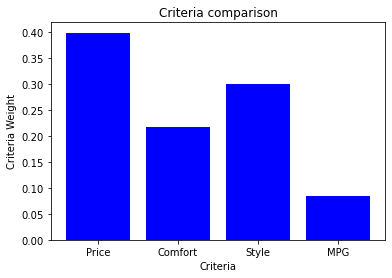

In [10]:
plt.bar(['Price','Comfort','Style','MPG'],[Price_weight, Comfort_weight, Style_weight, MPG_weight], color = 'blue')
plt.title('Criteria comparison')
plt.xlabel('Criteria')
plt.ylabel('Criteria Weight')

The above weight result shows that the Price criterion is the most important of all criteria, with a weight of 0.398, followed by the Style criteria with a weight of 0.299 and so on. 

### Table III: Pairwise Comparisons showing Preferences for the projects by criterion

### PRICE Criteria

In [11]:
PRICE_dic = {'PRICE': ['Project I','Project II','Project III'],
                 'Project I': [1,3,4],
                 'Project II': [1/3,1,2],
                 'Project III': [1/4,1/2,1,]}

PRICE_comparison = pd.DataFrame(PRICE_dic).set_index('PRICE')
PRICE_comparison

,Project I,Project II,Project III
PRICE,,,
Project I,1,0.333333,0.25
Project II,3,1.000000,0.50
Project III,4,2.000000,1.00


In [12]:
# Calculating the associated weight of each criteria
PRICE_criteria = PRICE_comparison.copy()
for col in ['Project I','Project II','Project III']:
    PRICE_criteria[col] = PRICE_criteria[col] / PRICE_criteria[col].sum()
PRICE_criteria

,Project I,Project II,Project III
PRICE,,,
Project I,0.125,0.1,0.142857
Project II,0.375,0.3,0.285714
Project III,0.500,0.6,0.571429


In [13]:
PRICE_P1 = (PRICE_criteria['Project I'][0] + PRICE_criteria['Project II'][0] + PRICE_criteria['Project III'][0])/3
PRICE_P2 = (PRICE_criteria['Project I'][1] + PRICE_criteria['Project II'][1] + PRICE_criteria['Project III'][1])/3
PRICE_P3 = (PRICE_criteria['Project I'][2] + PRICE_criteria['Project II'][2] + PRICE_criteria['Project III'][2])/3

print(f'Project Weight based on PRICE Criteria\n--------------------------------------\nProject I : {PRICE_P1:.3f}\nProject II : {PRICE_P2:.3f}\nProject III : {PRICE_P3:.3f}')

Project Weight based on PRICE Criteria
--------------------------------------
Project I : 0.123
Project II : 0.320
Project III : 0.557


Text(0, 0.5, 'Project Weight')

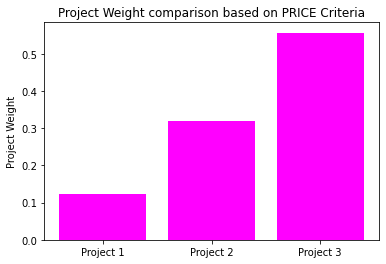

In [14]:
plt.bar(['Project 1','Project 2','Project 3'],[PRICE_P1,PRICE_P2,PRICE_P3], color = 'magenta')
plt.title('Project Weight comparison based on PRICE Criteria')
plt.ylabel('Project Weight')

The above result shows that Project III, Purchases of Cavalier models, has the highest weight of 0.557. This means if the 3 projects were to be analysed on the basis of the Price criteria only, Project III will be the best candidate for selection

### MPG Criteria

In [15]:
MPG_dic = {'MPG': ['Project I','Project II','Project III'],
                 'Project I': [1,4,6],
                 'Project II': [1/4,1,3],
                 'Project III': [1/6,1/3,1,]}

MPG_comparison = pd.DataFrame(MPG_dic).set_index('MPG')

# Calculating the associated weight of each criteria
MPG_criteria = MPG_comparison.copy()
for col in ['Project I','Project II','Project III']:
    MPG_criteria[col] = MPG_criteria[col] / MPG_criteria[col].sum()

MPG_P1 = (MPG_criteria['Project I'][0] + MPG_criteria['Project II'][0] + MPG_criteria['Project III'][0])/3
MPG_P2 = (MPG_criteria['Project I'][1] + MPG_criteria['Project II'][1] + MPG_criteria['Project III'][1])/3
MPG_P3 = (MPG_criteria['Project I'][2] + MPG_criteria['Project II'][2] + MPG_criteria['Project III'][2])/3

print(f'Project Weight based on MPG Criteria\n--------------------------------------\nProject I : {MPG_P1:.3f}\nProject II : {MPG_P2:.3f}\nProject III : {MPG_P3:.3f}')

Project Weight based on MPG Criteria
--------------------------------------
Project I : 0.087
Project II : 0.274
Project III : 0.639


Text(0, 0.5, 'Project Weight')

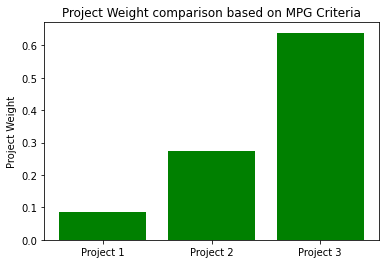

In [17]:
plt.bar(['Project 1','Project 2','Project 3'],[MPG_P1,MPG_P2,MPG_P3], color = 'green')
plt.title('Project Weight comparison based on MPG Criteria')
plt.ylabel('Project Weight')

The above result shows that Project III, Purchases of Cavalier models, has the highest weight of 0.639. This means if the 3 projects were to be analysed on the basis of the MPG criteria only, Project III will be the best candidate for selection

### COMFORT Criteria

In [18]:
COMFORT_dic = {'COMFORT': ['Project I','Project II','Project III'],
                 'Project I': [1,1/2,1/8],
                 'Project II': [2,1,1/6],
                 'Project III': [8,6,1,]}

COMFORT_comparison = pd.DataFrame(COMFORT_dic).set_index('COMFORT')

# Calculating the associated weight of each criteria
COMFORT_criteria = COMFORT_comparison.copy()
for col in ['Project I','Project II','Project III']:
    COMFORT_criteria[col] = COMFORT_criteria[col] / COMFORT_criteria[col].sum()

COMFORT_P1 = (COMFORT_criteria['Project I'][0] + COMFORT_criteria['Project II'][0] + COMFORT_criteria['Project III'][0])/3
COMFORT_P2 = (COMFORT_criteria['Project I'][1] + COMFORT_criteria['Project II'][1] + COMFORT_criteria['Project III'][1])/3
COMFORT_P3 = (COMFORT_criteria['Project I'][2] + COMFORT_criteria['Project II'][2] + COMFORT_criteria['Project III'][2])/3

print(f'Project Weight based on COMFORT Criteria\n--------------------------------------\nProject I : {COMFORT_P1:.3f}\nProject II : {COMFORT_P2:.3f}\nProject III : {COMFORT_P3:.3f}')

Project Weight based on COMFORT Criteria
--------------------------------------
Project I : 0.593
Project II : 0.341
Project III : 0.065


Text(0, 0.5, 'Project Weight')

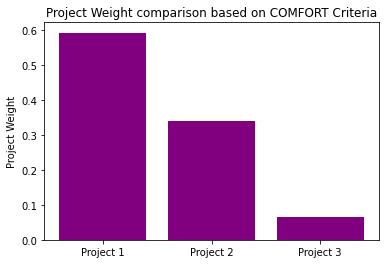

In [20]:
plt.bar(['Project 1','Project 2','Project 3'],[COMFORT_P1,COMFORT_P2,COMFORT_P3], color = 'purple')
plt.title('Project Weight comparison based on COMFORT Criteria')
plt.ylabel('Project Weight')

The above result shows that Project I, Purchases of Accord models, has the highest weight of 0.593. This means if the 3 projects were to be analysed on the basis of the Comfort criteria only, Project I will be the best candidate for selection.

### STYLE Criteria

In [21]:
STYLE_dic = {'STYLE': ['Project I','Project II','Project III'],
                 'Project I': [1,3,1/4],
                 'Project II': [1/3,1,1/7],
                 'Project III': [4,7,1,]}

STYLE_comparison = pd.DataFrame(STYLE_dic).set_index('STYLE')

# Calculating the associated weight of each criteria
STYLE_criteria = STYLE_comparison.copy()
for col in ['Project I','Project II','Project III']:
    STYLE_criteria[col] = STYLE_criteria[col] / STYLE_criteria[col].sum()

STYLE_P1 = (STYLE_criteria['Project I'][0] + STYLE_criteria['Project II'][0] + STYLE_criteria['Project III'][0])/3
STYLE_P2 = (STYLE_criteria['Project I'][1] + STYLE_criteria['Project II'][1] + STYLE_criteria['Project III'][1])/3
STYLE_P3 = (STYLE_criteria['Project I'][2] + STYLE_criteria['Project II'][2] + STYLE_criteria['Project III'][2])/3

print(f'Project Weight based on STYLE Criteria\n--------------------------------------\nProject I : {STYLE_P1:.3f}\nProject II : {STYLE_P2:.3f}\nProject III : {STYLE_P3:.3f}')

Project Weight based on STYLE Criteria
--------------------------------------
Project I : 0.265
Project II : 0.656
Project III : 0.080


Text(0, 0.5, 'Project Weight')

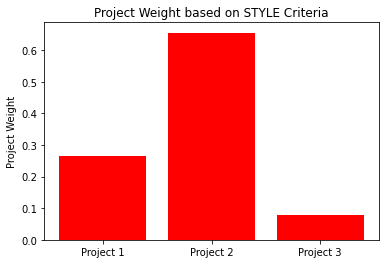

In [23]:
plt.bar(['Project 1','Project 2','Project 3'],[STYLE_P1,STYLE_P2,STYLE_P3], color = 'red')
plt.title('Project Weight based on STYLE Criteria')
plt.ylabel('Project Weight')

The above result shows that Project II, Purchases of Saturn models, has the highest weight of 0.656. This means if the 3 projects were to be analysed on the basis of the STYLE criteria only, Project II will be the best candidate for selection.

### Final Project Selection using the four criteria (AHP)

In [24]:
Project_1 = Price_weight*PRICE_P1 + Comfort_weight*COMFORT_P1 + MPG_weight*MPG_P1 + Style_weight*STYLE_P1
Project_2 = Price_weight*PRICE_P2 + Comfort_weight*COMFORT_P2 + MPG_weight*MPG_P2 + Style_weight*STYLE_P2
Project_3 = Price_weight*PRICE_P3 + Comfort_weight*COMFORT_P3 + MPG_weight*MPG_P3 + Style_weight*STYLE_P3

print(f'Project Weight based on all 4 Criteria\n--------------------------------------\nProject I : {Project_1:.3f}\nProject II : {Project_2:.3f}\nProject III : {Project_3:.3f}')

Project Weight based on all 4 Criteria
--------------------------------------
Project I : 0.265
Project II : 0.421
Project III : 0.314


Text(0, 0.5, 'Project Weight')

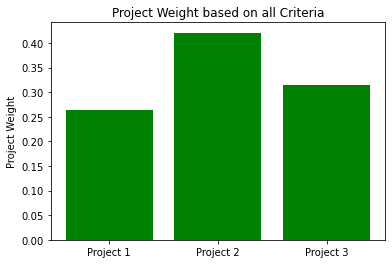

In [25]:
plt.bar(['Project 1','Project 2','Project 3'],[Project_1,Project_2,Project_3], color = 'green')
plt.title('Project Weight based on all Criteria')
plt.ylabel('Project Weight')

### Final decision

The final result above shows that the best project based on the combination of the four criteria is Project 2, Purchases of Saturn models.